In [6]:
# import stats packages
import matplotlib.pyplot as plt
import xarray
import cftime
import sys, os
import glob
import fiona
import numpy as numpy
import pandas as pd
import ipywidgets as widgets
from netCDF4 import Dataset 

# import spatial modules
import ee
import geemap
#from osgeo import gdal #install with pip3, don't use conda

# don't display warnings
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
#********************************* Initialize GEE  ***********************************#
## trigger the authentication flow. only need once
ee.Authenticate()
## After inserting the API key initialize GEE
ee.Initialize()

In [ ]:
#****************************** define user parameters *******************************#
# setup date range in which MODIS data will be extracted
dateBEG = ee.Date("1-01-01")
dateEND = ee.Date("2015-12-31")
# setup month in which MODIS data will be extracted 

In [16]:
#******************************** extract model outputs ******************************#
# select case run output directories
output_rootdir=os.path.expanduser('~')+'/output/cime_run_dirs/'
cases=numpy.asarray(glob.glob("%s*20TR*" % output_rootdir))
cases=[x.split('/')[-1] for x in cases]
cases_dropdown = widgets.Dropdown(options=cases,
                                description='Chose Case Name:',
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                  disabled=False)
# show a dropdown menu to select specific case output
# any cases that have been run in our elmoutput directory will be displayed
# case names will contain the site codes:
# AK-BEO; AK-CLG; AK-K64G AK-TLG
display(cases_dropdown)

Dropdown(description='Chose Case Name:', layout=Layout(width='max-content'), options=('OLMT_AK-K64G_ICB20TRCNP…

In [17]:
# select model output file
output_casedir=output_rootdir+cases_dropdown.value+'/run/'
filenames=numpy.asarray(glob.glob("%s*.elm.h?.*.nc" % output_casedir))
filenames=sorted([x.split('/')[-1] for x in filenames])
if(os.path.exists(output_casedir+'ELM_output.nc')): filenames.insert(0,'ELM_output.nc')

ncfiles_dropdown = widgets.Dropdown(options=filenames,
                                description='Choose Output File:', 
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

# display the output nc file options - in most cases you will select ELM_output.nc
display(ncfiles_dropdown)

Dropdown(description='Choose Output File:', layout=Layout(width='max-content'), options=('ELM_output.nc', 'OLM…

In [18]:
# select the variables to process
output_file=output_casedir+ncfiles_dropdown.value

fnc=Dataset(output_file)
vars=fnc.variables
vars_names=vars.keys()
vars_dims={}; vars_units={};
for v in vars: 
    vars_dims[v]=vars[v].dimensions
    if(hasattr(vars[v], 'units')):
        vars_units[v]=vars[v].units
    else:
        vars_units[v]='-'    
fnc.close()
vars_dropdown = widgets.Dropdown(options=vars_names,
                                description='Choose Variable Name',
                                style={'description_width':'auto'},
                                value='GPP',
                                layout={'width':'max-content'},
                                disabled=False)

display(vars_dropdown)

Dropdown(description='Choose Variable Name', index=188, layout=Layout(width='max-content'), options=('levgrnd'…

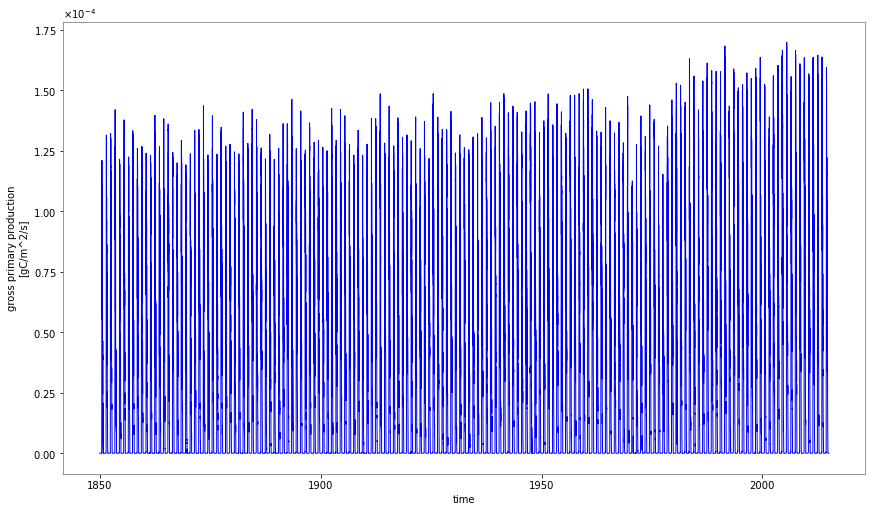

In [28]:
# extract variable from model outputs
var_name=vars_dropdown.value
# load in model output data
elm_output=xarray.open_dataset(output_file).squeeze()

var_data = elm_output[str(var_name)]
fig, ax = plt.subplots(clear=True, figsize=(12,7))
var_data.plot(ax=ax,linestyle='-',color='blue',label= var_name)

In [35]:
# conver xarray to dataframe
var_data_df = var_data.to_dataframe()
print(var_data_df)

                              GPP
time                             
1850-01-01 00:00:00  0.000000e+00
1850-01-02 00:00:00  0.000000e+00
1850-01-03 00:00:00  0.000000e+00
1850-01-04 00:00:00  0.000000e+00
1850-01-05 00:00:00  0.000000e+00
...                           ...
2014-12-28 00:00:00  2.337447e-11
2014-12-29 00:00:00  1.186410e-11
2014-12-30 00:00:00  0.000000e+00
2014-12-31 00:00:00  0.000000e+00
2015-01-01 00:00:00  1.796122e-11

[60226 rows x 1 columns]


In [36]:
###################load in remote sensing data for observations########################
#********************************* load in data **************************************#
# load in modis land surface albedo
modCOLL = ee.ImageCollection('MODIS/006/MOD17A2H').filter(ee.Filter.date(dateBEG, dateEND))
modCOLL = modCOLL.filter(ee.Filter.calendarRange(monBEG,monEND,'month'));
# count the number of images found
count = modCOLL.size()
print('Count: ', str(count.getInfo())+'\n')
# extract white sky and black sky albedo
modALB_WSA = modCOLL.select('Albedo_WSA_shortwave')
modALB_BSA = modCOLL.select('Albedo_BSA_shortwave')

SyntaxError: invalid syntax (2175860482.py, line 1)